# **NAME: BRIGHT ALORWOYIE**

---
---
## **PROJECT TOPIC: NO-SHOW APPOINTMENT**
---

---
---

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li> 
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

---
### Introduction

---
This project analyses the No-Show Appointment Dataset. The original source of the dataset is from Kaggle.com. The purpose of this analysis is to identify the relationship between probability of showing up at appointment days and some variables that could affect it.

The variables in the dataset are:
- PatientID: This is a unique identifier of every patient that books an appointment
- AppointmentID: A unique identifier of a patient's slot when they book an appointment
- Gender: Whether patient is male or female
- SheduleDay: The day the patient called the facility to book an appointment
- AppointmentDay: The actual day given to the client to meet a doctor
- Age: Patient's age
- Neighbourhood:location of the hospital
- Scholarship: This indicates if the patient is enrolled on a Brazilian welfare program or not
- Hypertention: whether or not the patient has the disease
- Diabetes: whether or not the patient has the disease
- Alcoholism: whether or not the patient has an issue of alcoholism
- Handicap: The level of handicap rated from 0 to 4
- SMS_Received: shows whether the patient has received an SMS reminder or not
- No_Show: 'No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

---
#### Questions for analysis

---
---
1. Which patient categories are more?
2. What is the turn-up rate with respect to Gender and AgeGroup?
3. How prone is gender and age group categories to specific diagnosis?
4. Which month and day are patients more likely to turn-up at the hospital?
5. What is the correlation between varriables and the dependent variable [No-Show]?

In [1]:
# #importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
# !pip install --upgrade pandas==0.25.0

DATA WRANGLING
---
---

In [3]:
# reading the data and viewing the first five rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
# checking the number of rows and columns
df.shape

(110527, 14)

In [5]:
# checking for null values from each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# check the meta info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# checking for duplicates 

df.duplicated().sum()

0

In [66]:
# checking if some patients have booked appointment more than ones
df.PatientId.duplicated().sum()

48223

**There are no duplicate entries in the data**

In [8]:
# creating a summary statistics about the data
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [9]:
# cross-checking the minimal value of age in the data
df['Age'].min()

-1

In [10]:
# finding the rows that contain the ages equal to one
df[df['Age']==-1]

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

Age cannot be less than zero so this row will be deleted in the subsequent sessions**

---

#### SUMMARY
**After inspecting the data, it can be observed that**

- The data contains 110527 rows and 14 columns
- There are no null values

- PatientId is expected to be an integer rather than a float
- ScheduleDay and AppointmentDay do not have the correct data type
- Age has a minimum value of -1, which is inaccurate because age cannot be negative
- Some column labels are not spelt correctly 


**The following transformations will be applied to clean the data**

- PatientId will be converted into integer
- ScheduleDay and AppointmentDay will be converted to Datetime
- Again, the time at the end of AppointmentDay and ScheduleDay would be removed since all the AppointmentDay times are set to 00:00:00
- Since only one patient has an age of less than zero, we will delete it from the data since it wont affect our data much
- I will relabel those columns spelt wrongly
- I will create a column for waiting time to help explain if the period of waiting has effect on being present on schedule days


DATA CLEANING
---

In [11]:
# Finding the unique values of Age

df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [60]:
#Converting PatiendId to integer
df['PatientId'] = df['PatientId'].astype('int64')
df['PatientId'].dtype

dtype('int64')

In [14]:
#Converting ScheduleDay to Datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64')
df['ScheduledDay'].dtype

dtype('<M8[ns]')

In [15]:
#Converting AppointmentDay to Datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64')
df['AppointmentDay'].dtype

dtype('<M8[ns]')

In [16]:
# confirming the changes made to the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [17]:
# Deleting Age less than zero (0)
df.drop([99832], axis = 0, inplace = True)

In [18]:
df[df['Age']==-1]

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

In [19]:
np.sort(df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [20]:
# checking for the number of entries with the age of zero
len(df[df['Age']== 0])

3539

- From the data, it is also observed that about 3539 patients are 0 years which is an age group not susceptible to Hypertention and Diabetes. In order to test if the data is devoid of errors, we will check the results of the age group.


In [21]:
# Checking if a patient with age zero (0) has any of the diseases
df[(df['Age']== 0) & ((df.Hipertension.astype('int64') == 1) | (df.Diabetes.astype('int64') == 1) | (df.Alcoholism.astype('int64') == 1))]

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

- It can be gleaned that no patient with age zero has the disease

**Renaming incorrectly spelt columns**
- Hipertension - Hypertension
- Handcap - Handicap

In [22]:
# renaming columns
df.rename(columns={'Hipertension' : 'Hypertension','Handcap':'Handicap'}, inplace = True)
df.head(1)

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  29872499824296        5642903      F   2016-04-29     2016-04-29   62   

     Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   

   SMS_received No-show  
0             0      No

**Feature Engineering**
- Creating a bin for Age group
- Checking the relevance of waiting time
- creating new columns for waiting time, days and months


In [69]:
# checking the statistics of age to help create a bin for the age group
df.Age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [68]:
# Creating a bin for Age. This will help analyse the the column in relation to other variables

bin_edges = [0, 18, 37, 55, 80, 115]

bin_labels = ['0-17', '18-36', '37-54', '55-80', '80+']

df['AgeGroup'] = pd.cut(df['Age'], bin_edges, labels = bin_labels, include_lowest = True)

df.head()

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0   29872499824296        5642903      F   2016-04-29     2016-04-29   62   
1  558997776694438        5642503      M   2016-04-29     2016-04-29   56   
2    4262962299951        5642549      F   2016-04-29     2016-04-29   62   
3     867951213174        5642828      F   2016-04-29     2016-04-29    8   
4    8841186448183        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handicap  SMS_received No-show  WaitingTime AppointmentWeekDay  \
0         0             0      No            0             Friday   
1         0             0      No            0             Friday   
2         0             0      No            0             Friday   
3         0             0      No            0             Friday   
4         0             0      No            0             Friday   

  AppointmentMonth AgeGroup  
0            April    55-80  
1            April    55-80  
2            April    55-80  
3            April     0-17  
4            April    55-80

In [23]:
# creating new columns for waiting time, appointment week day and appointment month
df['WaitingTime'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days
df['AppointmentWeekDay'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()
df['AppointmentMonth'] = pd.to_datetime(df.AppointmentDay).dt.month_name()
df.head(2)

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0   29872499824296        5642903      F   2016-04-29     2016-04-29   62   
1  558997776694438        5642503      M   2016-04-29     2016-04-29   56   

     Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   
1  JARDIM DA PENHA            0             0         0           0         0   

   SMS_received No-show  WaitingTime AppointmentWeekDay AppointmentMonth  
0             0      No            0             Friday            April  
1             0      No            0             Friday            April

In [24]:
# checking the statistical summary of waiting time
df['WaitingTime'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTime, dtype: float64

It can be observed that some of the waiting times are less than zero(0), which shouldn't be.
I will therefore explore the index of those waiting times and deal with them appropriately

In [25]:
# checking for waiting time less than 0
df[df['WaitingTime'] < 0.000000]

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
27033    7839272661752        5679978      M   2016-05-10     2016-05-09   38   
55226    7896293967868        5715660      F   2016-05-18     2016-05-17   19   
64175   24252258389979        5664962      F   2016-05-05     2016-05-04   22   
71533  998231581612122        5686628      F   2016-05-11     2016-05-05   81   
72362    3787481966821        5655637      M   2016-05-04     2016-05-03    7   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
27033    RESISTÊNCIA            0             0         0           0   
55226  SANTO ANTÔNIO            0             0         0           0   
64175     CONSOLAÇÃO            0             0         0           0   
71533  SANTO ANTÔNIO            0             0         0           0   
72362     TABUAZEIRO            0             0         0           0   

       Handicap  SMS_received No-show  WaitingTime AppointmentWeekDay  \
27033         1             0     Yes           -1             Monday   
55226         1             0     Yes           -1            Tuesday   
64175         0             0     Yes           -1          Wednesday   
71533         0             0     Yes           -6           Thursday   
72362         0             0     Yes           -1            Tuesday   

      AppointmentMonth  
27033              May  
55226              May  
64175              May  
71533              May  
72362              May

- It can be observed that the definition given for ScheduledDay and AppointmentDay from the documentation that it would be inaccurate for appointmentDay to come ahead of scheduleDay hence all waiting times less than 0 would be dropped from the data

In [26]:
# Deleting rows with negative waiting time

df.drop([27033, 55226, 64175, 71533, 72362], axis= 0, inplace = True)

# Confirming the removal of the dropped rows
df[df['WaitingTime'] < 0.000000]

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show, WaitingTime, AppointmentWeekDay, AppointmentMonth]
Index: []

## Exploratory Data Analysis (EDA)

### Questions to be explored

- Which category of Patients are more? Those who show up vs those who don't show up.
- What is the distribution of the dependent variable [NoShow] among Gender?
- What is the turn-up rate among age groups and gender?
- Which months and days of the week tend to see the highest rate of reporting on schedule?
- What is the relationship between age and and being prone to diseases

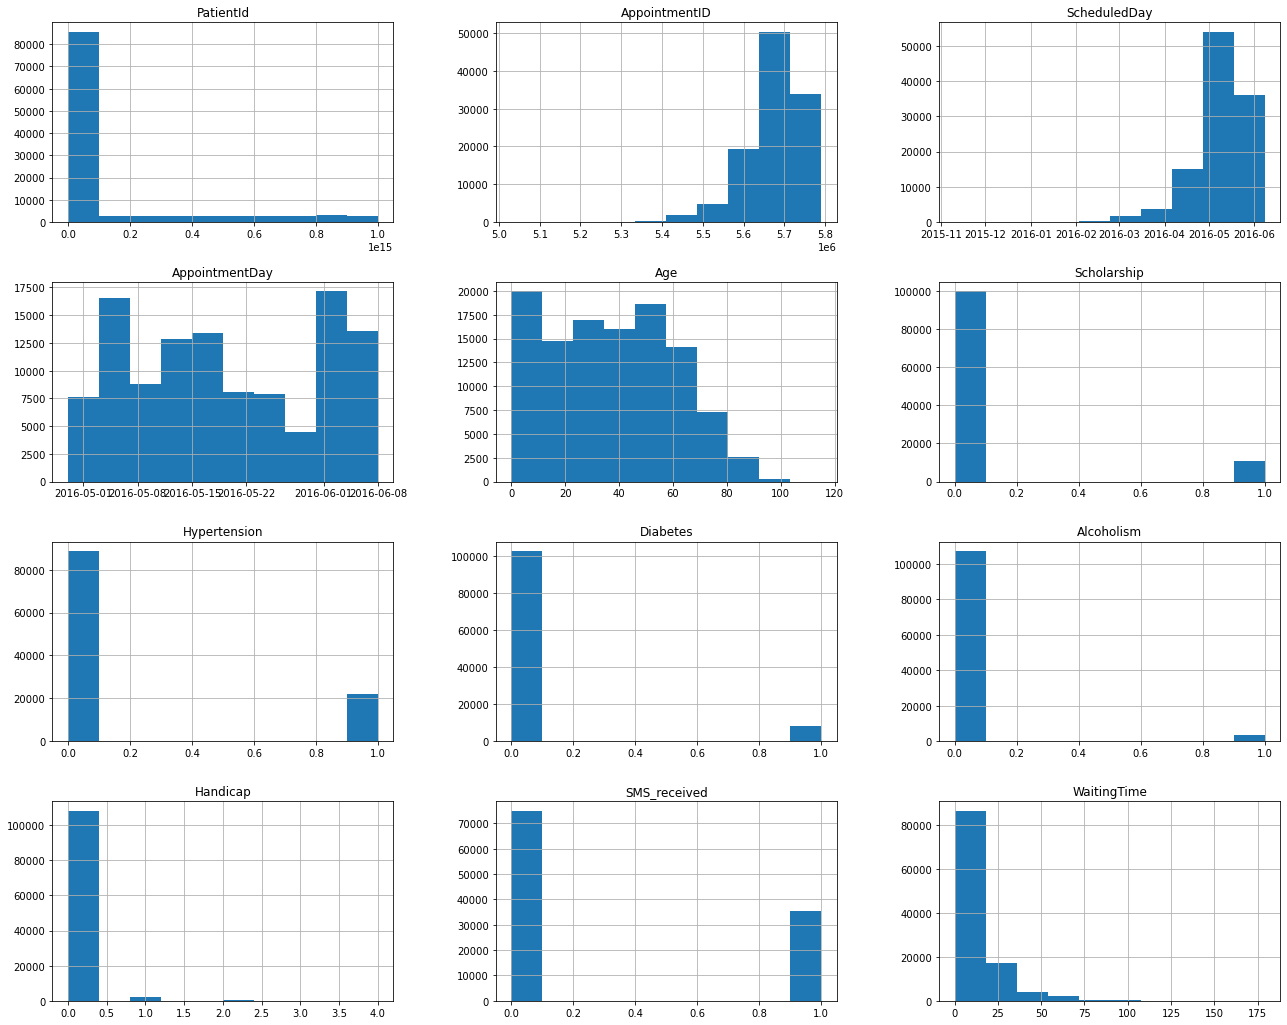

In [51]:
# checking for the distribution of the variables
df.hist(figsize= (22, 18));

From the histograms above, it is observed that scheduleDay is negatively skewed whereas waiting time is positively skewed

### Question 1: Which patient categories are more?

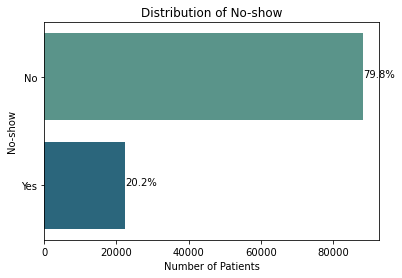

In [27]:
# Checking for the percentage of people who showed up on schedule 

def count_plot(df,column):    
    ax = sns.countplot(y=column, data=df, palette="crest")
    plt.title('Distribution of {}'.format(column))
    plt.xlabel('Number of Patients')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
count_plot(df, "No-show")

**From the above distribution, about 79.8% of the total number of patients who booked appointment showed up on schedule and 20.2% of them did not show up**

In [70]:
# Creating lists for variables based on similar charateristics

demographic_attributes = ['Gender', 'AgeGroup',]

diagnosis = ['Diabetes', 'Alcoholism', 'Handicap']

perks = ['Scholarship', 'SMS_received']

calendar = ['AppointmentWeekDay', 'AppointmentMonth']


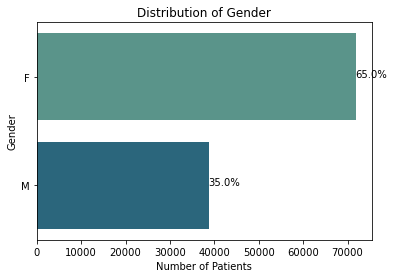

In [31]:
# checking for the distribution of the data among males and females
def count_plot(df,column):    
    ax = sns.countplot(y=column, data=df, palette="crest")
    plt.title('Distribution of {}'.format(column))
    plt.xlabel('Number of Patients')
    
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
count_plot(df, "Gender")

**From the data, about 65% of patients are females whereas 35% are males**

---
#### Question 2
**What is the turn-up rate with respect to Gender and AgeGroup?**

---

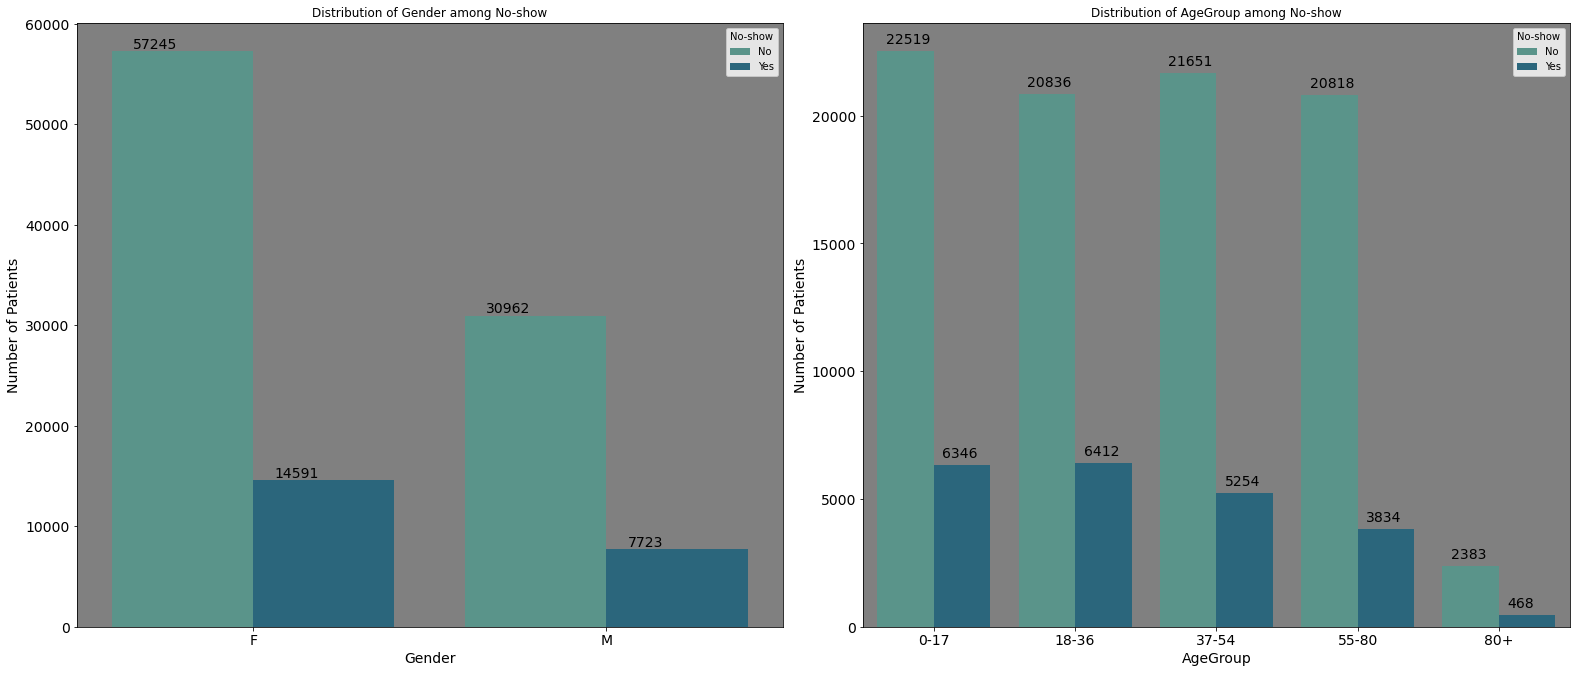

In [71]:
# Ploting a bar chart to show the turn-up rate of AgeGroup and Gender during appointment
plt.figure(figsize=(22,18))

for feature,col in enumerate(demographic_attributes):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=df, hue='No-show', x = col, palette = 'crest')

    plt.title('Distribution of {} among No-show'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patients", fontsize= 14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

**From the data, it can be observed that:**
1. Females tend to schedule more appointments than men. As it is revealed that 65% of those who schedule for the appointment are females and only 35% being males

2. Out of the 71836 females who scheduled the appointment, 57245 representing about 79.69% showed up on the appointment day

3. On the other hand, out of the 38865 males who booked appointment, 30962 representing 79.67% turned up. 
   - Comparatively, both males and females have an almost equal turn up rate. However, more females visit the hospital more often than males

4. Patients between the ages of 0-17 are the highest to show up during appointments whereas 18-36 age groups are the highest who do not turn up on appointment days

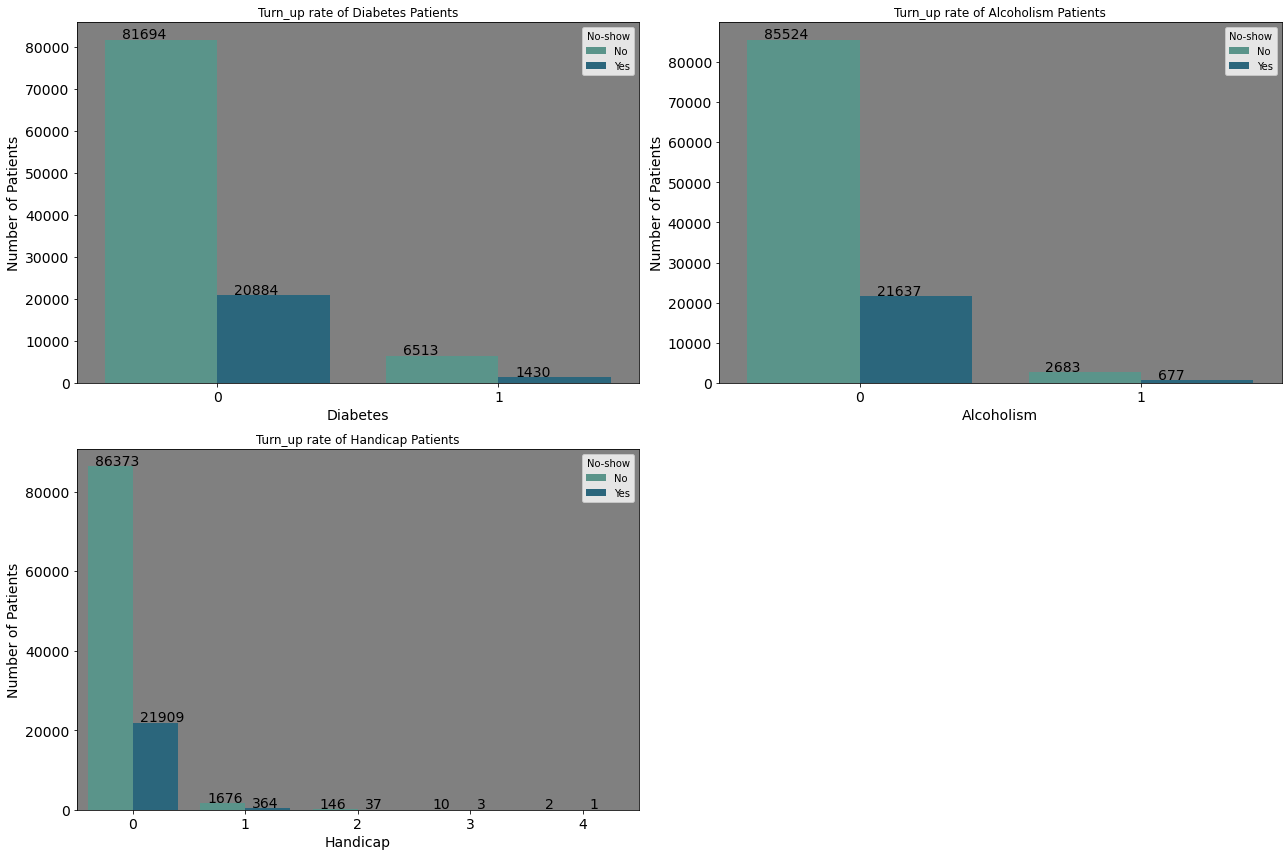

In [72]:
# Plotting the turn_up rate among patients with specific diagnosis
plt.figure(figsize=(18,12))

for feature,col in enumerate(diagnosis):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=df, hue='No-show', x = col, palette = 'crest')

    plt.title('Turn_up rate of {} Patients'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patients", fontsize= 14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

- From the above, more patients seems to be diagnosed of not having diabetes, alcoholism and handicap than men. Out of the 110521 patients diagnosed for Diabetes, 92.81% of them do not have. Again, out of the 102578 diabetes patients that scheduled appointment, only 79.64% showed up.

- 96.95% of patients tested for alcoholism do not have and only 3.05% have. 79.81% of the total patients who do not suffer alcoholism were present on schedule however 79.85% of those diagnosed to have issues with alcoholism turned up on the appointment day

- More of the patients have zero level of handicap

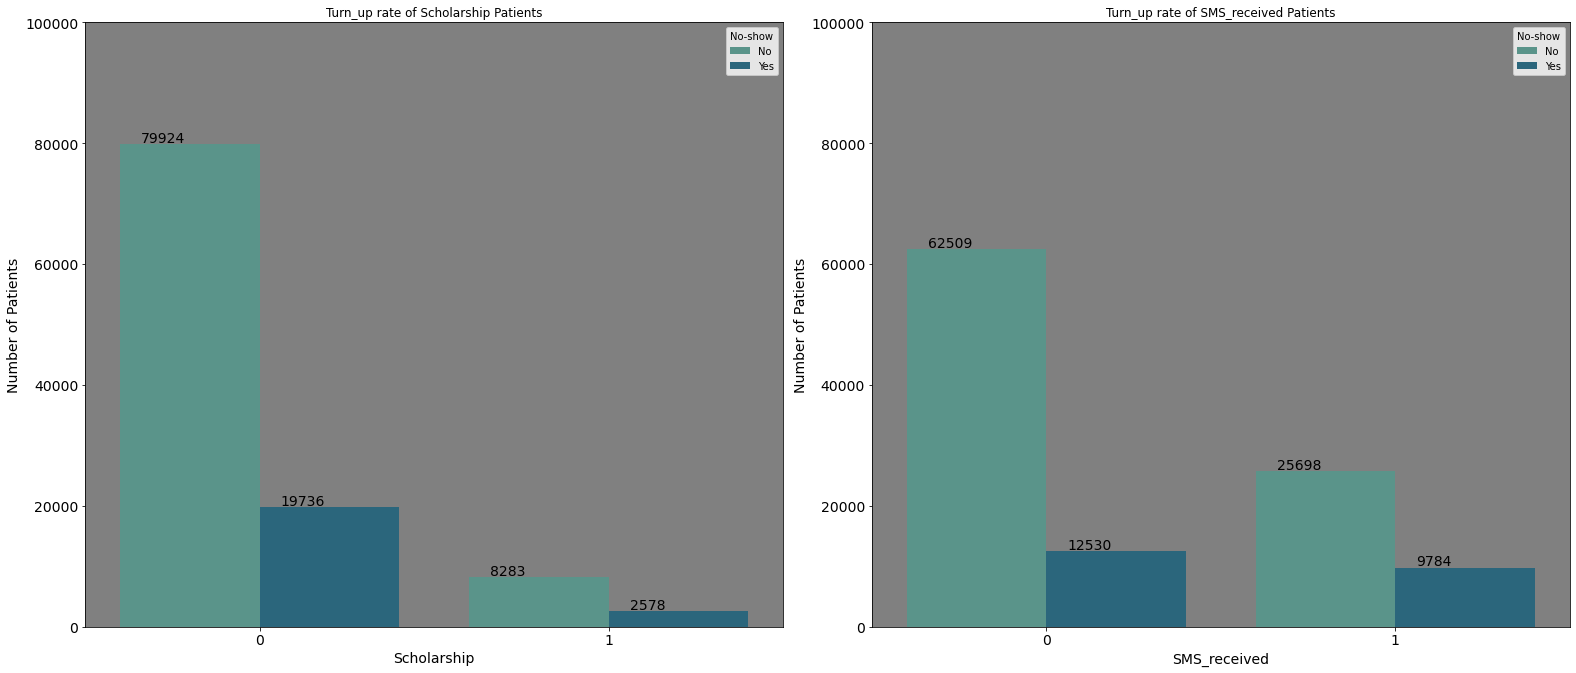

In [73]:
# Plotting for the turn-up rate of patients who have scholarships or recieived an sms
plt.figure(figsize=(22,18))

for feature,col in enumerate(perks):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=df, hue='No-show', x = col, palette = 'crest')

    plt.title('Turn_up rate of {} Patients'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patients", fontsize= 14)
    plt.ylim(0,100000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

- About 90.17% of the patients were not enrolled on the Brasilian welfare program. However, 80.20% of those who did not enrol on the program showed up on the appintment day. Again only 76.26% of those that enrol on the program showed up

- Most of the patients did not receive sms. However, only 72.43% of those who received the sms showed up

---
### Question 3: How prone is gender and age group categories to specific diagnosis?

---

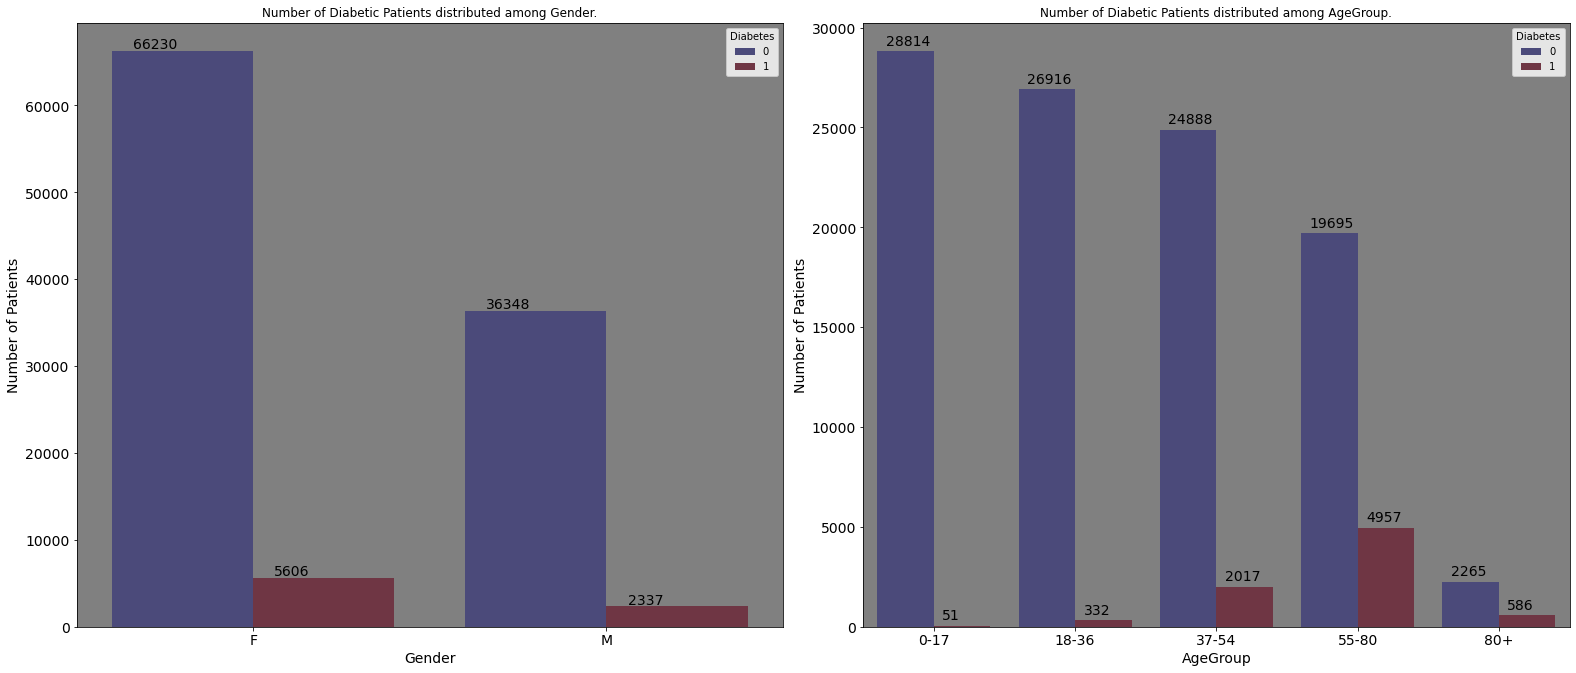

In [36]:
# Ploting the distribution of gender and agegroup among diabetes patients

plt.figure(figsize=(22,18))

for feature,col in enumerate(demographic_attributes):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=df, hue='Diabetes', x = col, palette = 'icefire')

    plt.title(f"Number of Diabetic Patients distributed among {col}.")
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patients", fontsize= 14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

- More females than men were diagnosed of diabetes. 
- The age group of 55-80 are the highest positive diabetes patients followed by the agegroup of 37-54

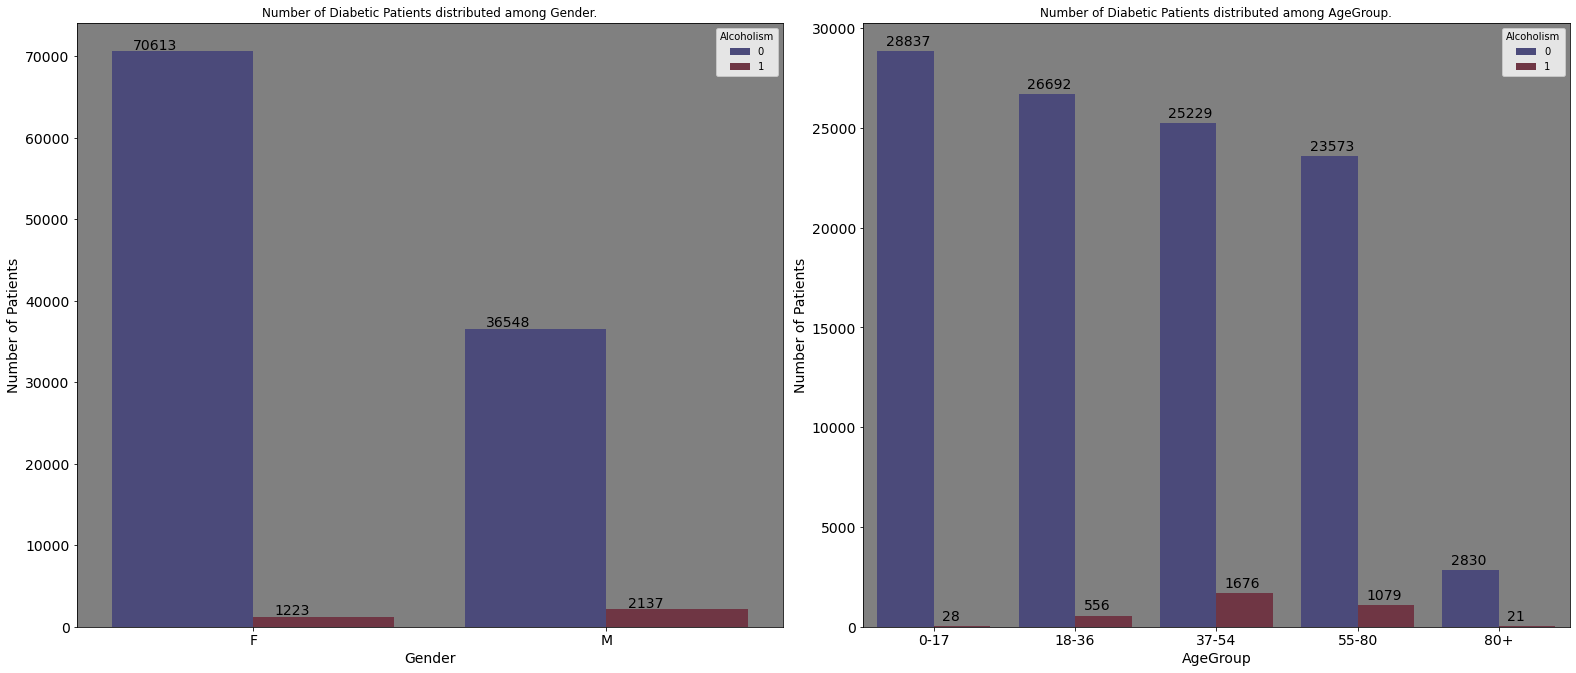

In [37]:
# Plotting for the distribution of gender and agegroup among those diagnosed of alcoholism
plt.figure(figsize=(22,18))

for feature,col in enumerate(demographic_attributes):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=df, hue='Alcoholism', x = col, palette = 'icefire')

    plt.title(f"Number of Diabetic Patients distributed among {col}.")
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patients", fontsize= 14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

- More men than women were diagnosed with the problem of alcoholism
- the age group of 37-54 tend to be the highest with the issue of alcoholism 

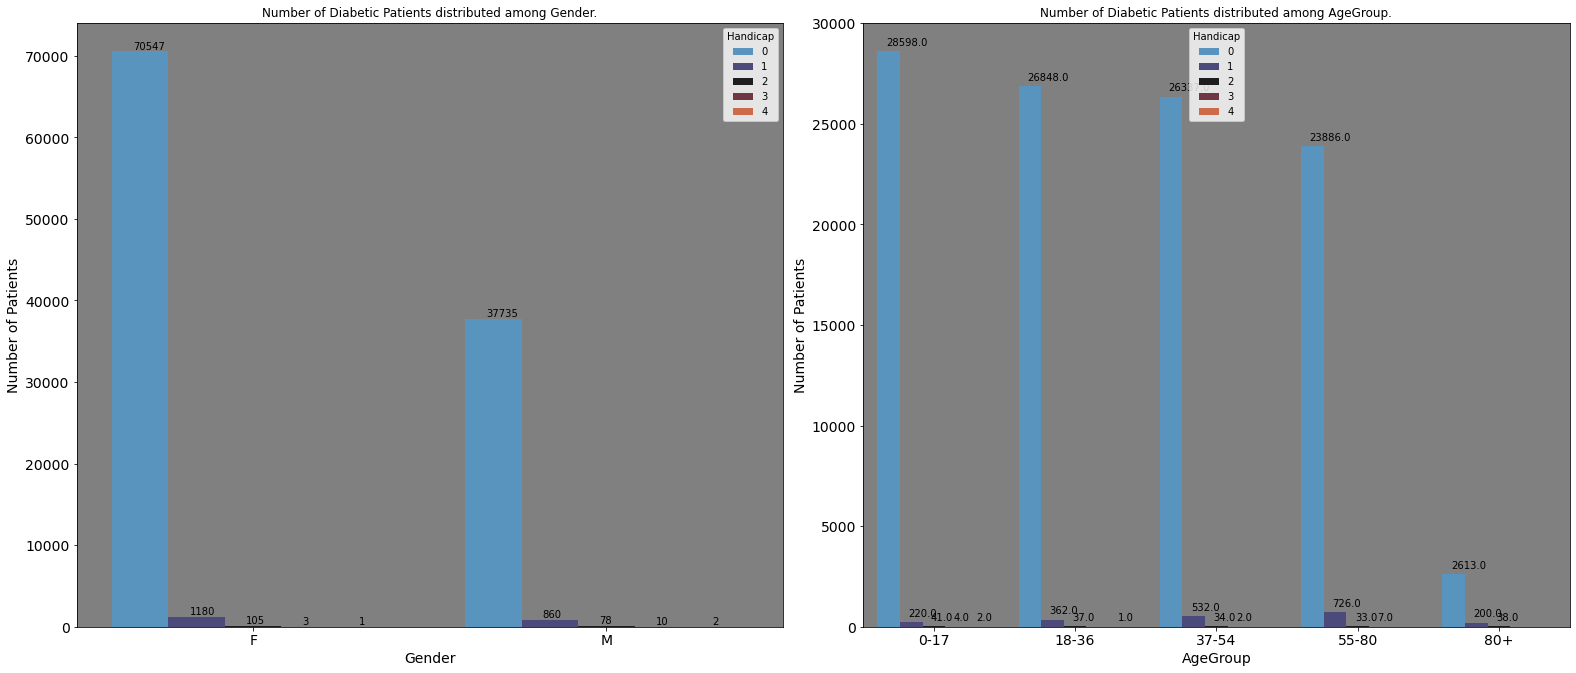

In [85]:
# Plotting for the distribution of gender and agegroup among those diagnosed of some level of handicap

plt.figure(figsize=(22,18))

for feature,col in enumerate(demographic_attributes):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=df, hue='Handicap', x = col, palette = 'icefire')

    plt.title(f"Number of Diabetic Patients distributed among {col}.")
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patients", fontsize= 14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 10)

plt.tight_layout()

plt.show()

- Zero level of handicap seems to be the highest among both males and females
- The age group of 0-17 recorded the highest zero level handicap

---
### Question 4: Which month and day are patients more likely to turn-up at the hospital?

---

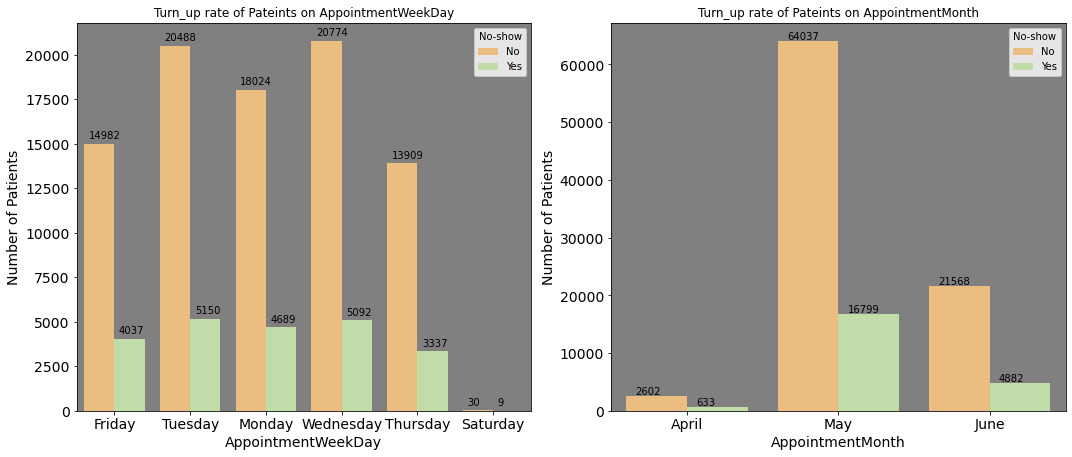

In [39]:
# Finding the days of the week and months patients are nore like to show up

plt.figure(figsize=(15,12))

for feature,col in enumerate(calendar):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=df, hue='No-show', x = col, palette = 'Spectral')

    plt.title('Turn_up rate of Pateints on {}'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patients", fontsize= 14)
#     plt.ylim(0,70000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 10)

plt.tight_layout()

plt.show()

- Wednesdays have seen the highest level of turn-up on appointment days. Tuesdays on the other hand recorded the day patients do not show up for appointment the most

- May recorded the highest month where most patients showed up for their appointment

---
### Question 5: What is the correlation between varriables and the dependent variable [No-Show]?

---

In [76]:
# Finding the correlation between variables in the dataset

df.corr()

PatientId  AppointmentID       Age  Scholarship  Hypertension  \
PatientId       1.000000       0.004019 -0.004192    -0.002873     -0.006431   
AppointmentID   0.004019       1.000000 -0.019109     0.022620      0.012760   
Age            -0.004192      -0.019109  1.000000    -0.092469      0.504599   
Scholarship    -0.002873       0.022620 -0.092469     1.000000     -0.019738   
Hypertension   -0.006431       0.012760  0.504599    -0.019738      1.000000   
Diabetes        0.001612       0.022633  0.292398    -0.024899      0.433082   
Alcoholism      0.011016       0.032947  0.095811     0.035019      0.087967   
Handicap       -0.007855       0.014077  0.078101    -0.008555      0.080162   
SMS_received   -0.009735      -0.256614  0.012629     0.001182     -0.006285   
WaitingTime    -0.001442      -0.771840  0.034813    -0.030435     -0.017236   

               Diabetes  Alcoholism  Handicap  SMS_received  WaitingTime  
PatientId      0.001612    0.011016 -0.007855     -0.009735    -0.001442  
AppointmentID  0.022633    0.032947  0.014077     -0.256614    -0.771840  
Age            0.292398    0.095811  0.078101      0.012629     0.034813  
Scholarship   -0.024899    0.035019 -0.008555      0.001182    -0.030435  
Hypertension   0.433082    0.087967  0.080162     -0.006285    -0.017236  
Diabetes       1.000000    0.018471  0.057578     -0.014561    -0.027200  
Alcoholism     0.018471    1.000000  0.004668     -0.026154    -0.038527  
Handicap       0.057578    0.004668  1.000000     -0.024097    -0.019774  
SMS_received  -0.014561   -0.026154 -0.024097      1.000000     0.398128  
WaitingTime   -0.027200   -0.038527 -0.019774      0.398128     1.000000

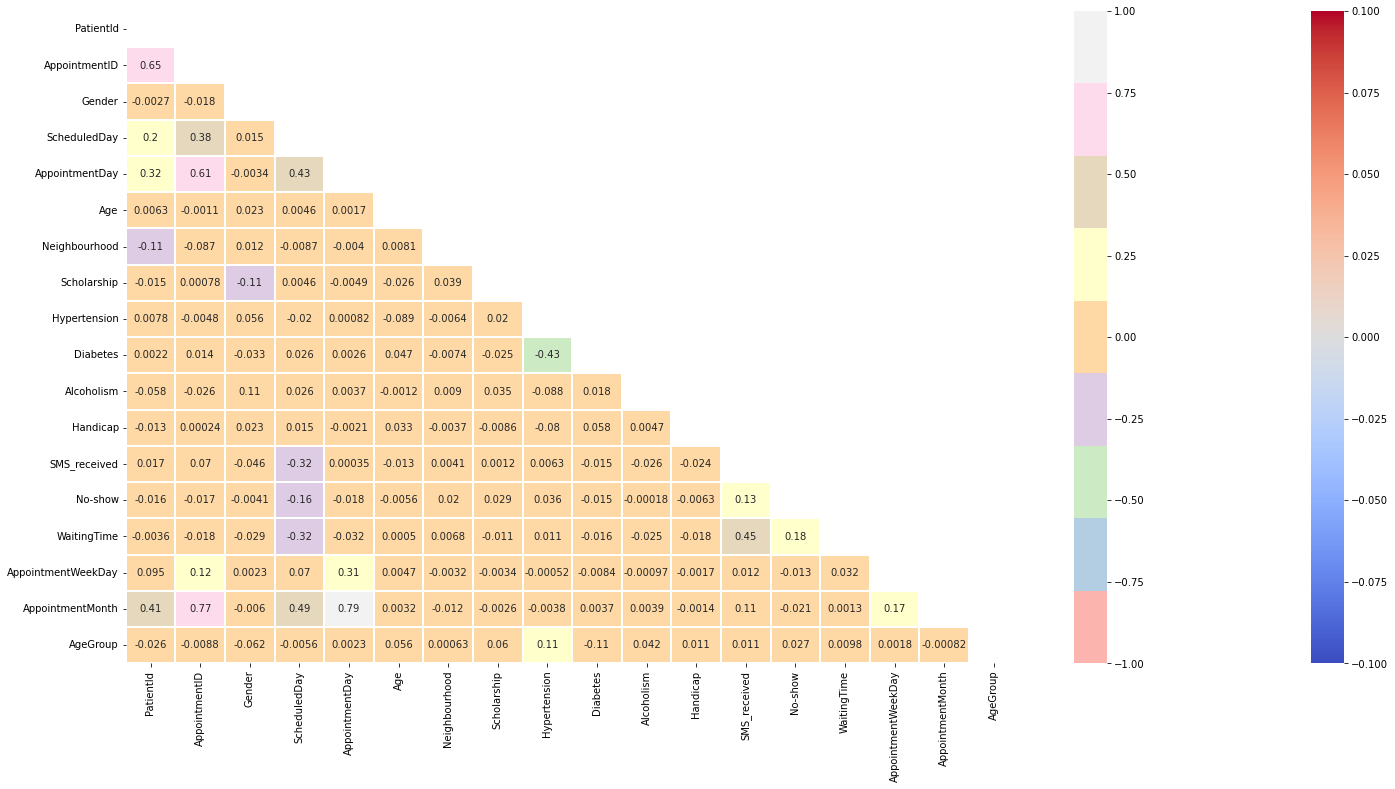

In [84]:
# Plotting the correlation between variables using a heatmap
plt.figure(figsize=(25,12));
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,annot=corr,cmap='coolwarm',fmt='.2g',mask=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='Pastel1', vmin=-1, vmax=1)


---
### Conclusion

---

**From the analysis, it can be concluded that:**
- About 79.8% of the total number of patients who booked appointment showed up on schedule and 20.2% of them did not show up
- About 65% of patients are females whereas 35% are males
- Comparatively, both males and females have an almost equal turn up rate on appointment days. ie 79.67% and 79.69% respectively. However, more females visit the hospital more often than males
- Patients between the ages of 0-17 are the highest to show up during appointments whereas 18-36 age groups are the highest who do not turn up on appointment days
- More patients seems to be diagnosed of not having diabetes, alcoholism and handicap than men. Out of the 110521 patients diagnosed for Diabetes, 92.81% of them do not have. Again, out of the 102578 diabetes patients that scheduled appointment, only 79.64% showed up.
- 96.95% of patients tested for alcoholism do not have and only 3.05% have. 79.81% of the total patients who do not suffer alcoholism were present on schedule however 79.85% of those diagnosed to have issues with alcoholism turned up on the appointment day
- More females than men were diagnosed of diabetes.
- The age group of 55-80 are the highest positive diabetes patients followed by the agegroup of 37-54
- Wednesdays have seen the highest level of turn-up on appointment days. Tuesdays on the other hand recorded the day patients do not show up for appointment the most
- May recorded the highest month where most patients showed up for their appointment

---
### Limitations

---
***The following limitations were identified in the dataset***
1. The data did not provide information about the location of patient neither their distance from the hospital so it was difficult to analyse the nighbourhood variable.
2. Much details was not provided about the the handicap variable so it was difficult to explain the levels
3. Most of column variables were categorical which limits further analysis of the variables and how they may affect the dependent variable